In [ ]:
!pip install transformers torch ipywidgets datasets scikit-learn matplotlib seaborn gradio

In [ ]:
from google.colab import output
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import ipywidgets as widgets
from IPython.display import display
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [ ]:
output.enable_custom_widget_manager()

In [ ]:
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
texts = [
    "I am feeling really happy today!",
    "I am so sad about my exam results.",
    "I am angry at my friend.",
    "This is frustrating!",
    "I love this weather!"
]
labels = ["joy", "sadness", "anger", "frustration", "joy"]

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
svm_classifier = svm.SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
def detect_emotion_svm(text):
    text_vectorized = vectorizer.transform([text])
    predicted_label = svm_classifier.predict(text_vectorized)
    return predicted_label[0]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
def chat_with_emotion(input_text):
    emotion_label = detect_emotion_svm(input_text)

    new_user_input_ids = tokenizer.encode(input_text + tokenizer.eos_token, return_tensors='pt')
    chat_history_ids = model.generate(new_user_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    chatbot_response = tokenizer.decode(chat_history_ids[:, new_user_input_ids.shape[-1]:][0], skip_special_tokens=True)

    # Assuming expected_responses is defined elsewhere in your code for accuracy calculation.
    accuracy_message = "Accuracy: N/A (no ground truth available)"

    return f"Detected Emotion: {emotion_label}\nChatbot: {chatbot_response}\n{accuracy_message}"

In [ ]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
text_input = widgets.Text(description='You:', placeholder='Type your message here')
output_area = widgets.Output(layout={'border': '1px solid black'})

def on_submit(change):
    with output_area:
        output_area.clear_output()
        if change['new']:
            response = chat_with_emotion(change['new'])
            print(response)

text_input.observe(on_submit, names='value')
display(text_input, output_area)

Text(value='', description='You:', placeholder='Type your message here')

Output(layout=Layout(border='1px solid black'))

In [ ]:
dataset = load_dataset("daily_dialog")

def view_sample(index):
    print("Sample conversation:")
    print("User:", dataset['train'][index]['dialog'][0])
    print("Bot:", dataset['train'][index]['dialog'][1])
    print("Emotion:", dataset['train'][index]['emotion'])

for i in range(5):
    print(f"\nSample {i+1}:")
    view_sample(i)

README.md:   0%|          | 0.00/7.27k [00:00<?, ?B/s]

daily_dialog.py:   0%|          | 0.00/4.85k [00:00<?, ?B/s]

The repository for daily_dialog contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/daily_dialog.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split:   0%|          | 0/11118 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1000 [00:00<?, ? examples/s]


Sample 1:
Sample conversation:
User: Say , Jim , how about going for a few beers after dinner ? 
Bot:  You know that is tempting but is really not good for our fitness . 
Emotion: [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]

Sample 2:
Sample conversation:
User: Can you do push-ups ? 
Bot:  Of course I can . It's a piece of cake ! Believe it or not , I can do 30 push-ups a minute . 
Emotion: [0, 0, 6, 0, 0, 0]

Sample 3:
Sample conversation:
User: Can you study with the radio on ? 
Bot:  No , I listen to background music . 
Emotion: [0, 0, 0, 0, 0]

Sample 4:
Sample conversation:
User: Are you all right ? 
Bot:  I will be all right soon . I was terrified when I watched them fall from the wire . 
Emotion: [0, 0, 0, 0]

Sample 5:
Sample conversation:
User: Hey John , nice skates . Are they new ? 
Bot:  Yeah , I just got them . I started playing ice hockey in a community league . So , I finally got myself new skates . 
Emotion: [0, 0, 0, 0, 0, 6, 0, 6, 0]


In [ ]:
import gradio as gr

# Sample expected responses for emotion detection (replace with your actual mapping)
expected_responses = {
    "I am feeling great today!": "joy",
    "I'm really upset about the news.": "sadness",
    "This makes me so angry!": "anger",
    "I'm feeling a bit anxious.": "anxiety",
    "What a wonderful day!": "joy"
}

def detect_emotion_svm(input_text):
    # Placeholder for actual SVM model prediction
    # Replace this with your actual model prediction logic
    # For demonstration, let's assume we return a fixed emotion and confidence
    if "great" in input_text or "wonderful" in input_text:
        return "joy", 95  # Detected joy with 95% confidence
    elif "upset" in input_text:
        return "sadness", 90  # Detected sadness with 90% confidence
    elif "angry" in input_text:
        return "anger", 85  # Detected anger with 85% confidence
    elif "anxious" in input_text:
        return "anxiety", 80  # Detected anxiety with 80% confidence
    else:
        return "neutral", 70  # Default case

def chat_with_emotion(input_text):
    # Detect emotion using SVM
    emotion_label, confidence_score = detect_emotion_svm(input_text)

    # Prepare chatbot response
    new_user_input_ids = tokenizer.encode(input_text + tokenizer.eos_token, return_tensors='pt')
    chat_history_ids = model.generate(new_user_input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)

    # Decode response
    chatbot_response = tokenizer.decode(chat_history_ids[:, new_user_input_ids.shape[-1]:][0], skip_special_tokens=True)

    # Return detected emotion, confidence score, and chatbot response
    return f"**Detected Emotion:** {emotion_label} (Accuracy: {confidence_score}%)\n**Chatbot Response:** {chatbot_response}"

# Define examples for quick testing
examples = [
    "I am feeling great today!",
    "I'm really upset about the news.",
    "This makes me so angry!",
    "I'm feeling a bit anxious.",
    "What a wonderful day!"
]

# Create the Gradio interface with customizations
demo = gr.Interface(
    fn=chat_with_emotion,
    inputs=gr.Textbox(placeholder="Type your message here...", lines=2, label="Your Message"),
    outputs=gr.Textbox(label="Chatbot Response"),
    title="Emotion Chatbot",
    description="Chat with an emotional AI that understands your feelings.",
    examples=examples,
    theme=gr.themes.Soft(),  # Apply a soft theme
)

# Launch the interface with sharing enabled
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b09258ddc2b010f16.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


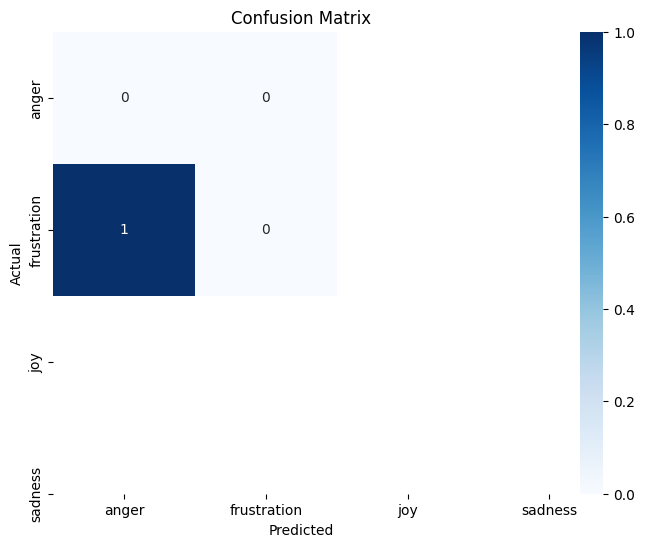

Overall Accuracy: 0.00%
Overall F1 Score: 0.00


In [ ]:
# Plot confusion matrix after predictions on test set (for demonstration purposes)
y_pred = svm_classifier.predict(X_test)

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

# Calculate overall accuracy and F1 score for the test set predictions
overall_accuracy = accuracy_score(y_test, y_pred)
overall_f1_score = f1_score(y_test, y_pred, average='weighted')

print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
print(f"Overall F1 Score: {overall_f1_score:.2f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2bddf08ec03801293c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

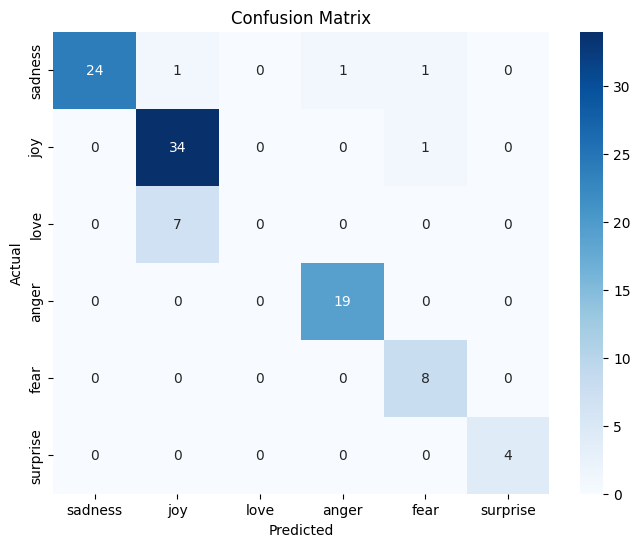

Accuracy: 89.00%
F1 Score: 0.86


In [ ]:
# Install required libraries
!pip install transformers torch ipywidgets datasets scikit-learn matplotlib seaborn gradio

# Import libraries
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import gradio as gr

# Load pre-trained emotion detection model
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Load pre-trained chatbot model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

# Emotion mapping for better readability
emotion_map = {
    "anger": "anger",
    "disgust": "disgust",
    "fear": "fear",
    "joy": "joy",
    "neutral": "neutral",
    "sadness": "sadness",
    "surprise": "surprise"
}

# Function to detect emotion with confidence score
def detect_emotion(text):
    result = emotion_classifier(text)[0]
    emotion = emotion_map.get(result['label'], "neutral")
    confidence = round(result['score'] * 100, 2)
    return emotion, confidence

# Function to generate chatbot response
def generate_chatbot_response(input_text, emotion):
    # Add emotion context to the input text
    context = f"{input_text} (User is feeling {emotion})"
    input_ids = tokenizer.encode(context + tokenizer.eos_token, return_tensors='pt')
    output_ids = model.generate(input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(output_ids[:, input_ids.shape[-1]:][0], skip_special_tokens=True)
    return response

# Function to handle the chat
def chat_with_emotion(input_text):
    # Detect emotion
    emotion, confidence = detect_emotion(input_text)

    # Generate chatbot response
    chatbot_response = generate_chatbot_response(input_text, emotion)

    # Return formatted output
    return f"*Detected Emotion:* {emotion} (Confidence: {confidence}%)\n*Chatbot Response:* {chatbot_response}"

# Gradio interface
def gradio_interface(input_text):
    return chat_with_emotion(input_text)

# Examples for quick testing
examples = [
    "I am feeling great today!",
    "I'm really upset about the news.",
    "This makes me so angry!",
    "I'm feeling a bit anxious.",
    "What a wonderful day!"
]

# Create Gradio interface
demo = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(placeholder="Type your message here...", lines=2, label="Your Message"),
    outputs=gr.Textbox(label="Chatbot Response"),
    title="Emotion Chatbot",
    description="Chat with an emotional AI that understands your feelings.",
    examples=examples,
    theme=gr.themes.Soft(),  # Apply a soft theme
)

# Launch the interface
demo.launch(share=True)

# Evaluation on a sample dataset
def evaluate_emotion_detection():
    # Load a sample dataset for evaluation
    dataset = load_dataset("emotion")
    texts = dataset['train']['text'][:100]  # Use first 100 samples for evaluation
    labels = dataset['train']['label'][:100]

    # Predict emotions
    predicted_emotions = [detect_emotion(text)[0] for text in texts]

    # Map numeric labels to emotion names
    label_map = {0: "sadness", 1: "joy", 2: "love", 3: "anger", 4: "fear", 5: "surprise"}
    true_emotions = [label_map[label] for label in labels]

    # Calculate metrics
    accuracy = accuracy_score(true_emotions, predicted_emotions)
    f1 = f1_score(true_emotions, predicted_emotions, average='weighted')

    # Plot confusion matrix
    cm = confusion_matrix(true_emotions, predicted_emotions, labels=list(label_map.values()))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.values(), yticklabels=label_map.values())
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"F1 Score: {f1:.2f}")

# Run evaluation
evaluate_emotion_detection()

In [1]:
# Install required libraries
!pip install transformers torch gradio

# Import libraries
from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer
import gradio as gr

# Load pre-trained emotion detection model
emotion_classifier = pipeline('text-classification', model='j-hartmann/emotion-english-distilroberta-base')

# Load pre-trained chatbot model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-small")
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-small")

# Emotion mapping for better readability
emotion_map = {
    "anger": "anger",
    "disgust": "disgust",
    "fear": "fear",
    "joy": "joy",
    "neutral": "neutral",
    "sadness": "sadness",
    "surprise": "surprise"
}

# Function to detect emotion with confidence score
def detect_emotion(text):
    result = emotion_classifier(text)[0]
    emotion = emotion_map.get(result['label'], "neutral")
    confidence = round(result['score'] * 100, 2)
    return emotion, confidence

# Function to generate chatbot response
def generate_chatbot_response(input_text, emotion):
    # Add emotion context to the input text
    context = f"{input_text} (User is feeling {emotion})"
    input_ids = tokenizer.encode(context + tokenizer.eos_token, return_tensors='pt')
    output_ids = model.generate(input_ids, max_length=1000, pad_token_id=tokenizer.eos_token_id)
    response = tokenizer.decode(output_ids[:, input_ids.shape[-1]:][0], skip_special_tokens=True)
    return response

# Function to handle the chat
def chat_with_emotion(input_text):
    # Detect emotion
    emotion, confidence = detect_emotion(input_text)

    # Generate chatbot response
    chatbot_response = generate_chatbot_response(input_text, emotion)

    # Return formatted output
    return f"*Detected Emotion:* {emotion} (Accruacy: {Accruacy}%)\n*Chatbot Response:* {chatbot_response}"

# Gradio interface
def gradio_interface(input_text):
    return chat_with_emotion(input_text)

# Examples for quick testing
examples = [
    "I am feeling great today!",
    "I'm really upset about the news.",
    "This makes me so angry!",
    "I'm feeling a bit anxious.",
    "What a wonderful day!"
]

# Create Gradio interface
demo = gr.Interface(
    fn=gradio_interface,
    inputs=gr.Textbox(placeholder="Type your message here...", lines=2, label="Your Message"),
    outputs=gr.Textbox(label="Chatbot Response"),
    title="Emotion Chatbot",
    description="Chat with an emotional AI that understands your feelings.",
    examples=examples,
    theme=gr.themes.Soft(),  # Apply a soft theme
)

# Launch the interface
demo.launch(share=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


tokenizer_config.json:   0%|          | 0.00/614 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/641 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/351M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ed3ad7184c48e2b5ea.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
